In [44]:
import matplotlib.pyplot as plt
import numpy as np

%store -r common
%store -r NDE_Dict
%store -r TDE_Dict

from TOTAL_LIAB_EQUITY_Ratio import Get_Data
import nbimporter

In [25]:
file = open("S_and_L.csv", "r")
next(file)

sec = {}
loc = {}
for row in file:
    try:
        ID,sector,location = row.split(",")
        
        if location in loc.keys():
            loc[location] += 1
        else:
            loc[location] = 1

        if sector in sec.keys():
            sec[sector] += 1
        elif sector != '':
            sec[sector] = 1
                
    except ValueError:
        continue

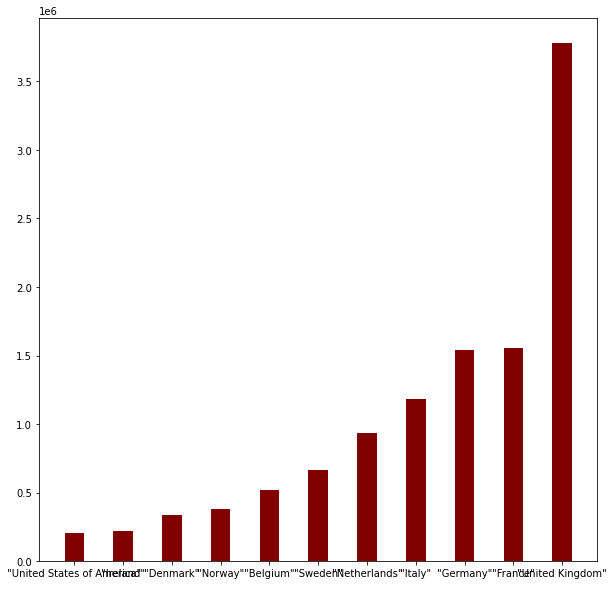

In [26]:
loc = {k: v for k, v in sorted(loc.items(), key=lambda item: item[1])}

plt.figure(figsize = (10,10))
plt.bar(list(loc.keys())[-11:], list(loc.values())[-11:], color ='maroon',width = 0.4)
plt.show()

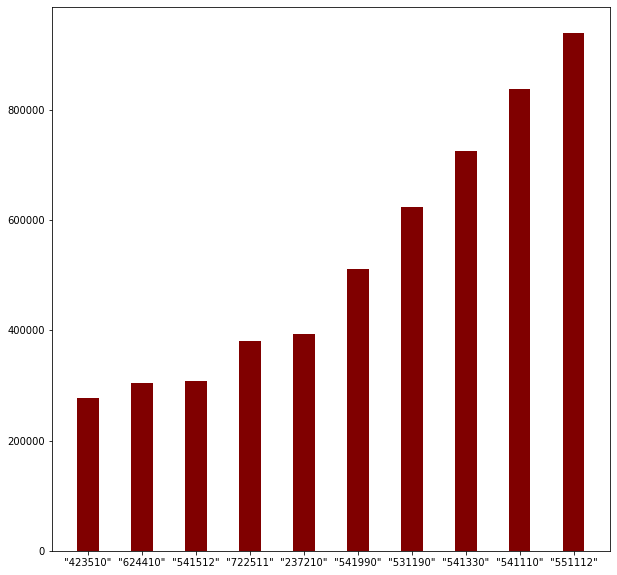

In [27]:
sec = {k: v for k, v in sorted(sec.items(), key=lambda item: item[1])}

plt.figure(figsize = (10,10))
plt.bar(list(sec.keys())[-10:], list(sec.values())[-10:], color ='maroon',width = 0.4)
plt.show()

In [28]:
print(len(sec))

1957


In [29]:
file = open("S_and_L.csv", "r")
next(file)

NAICS = ['541990', '623110', '611110', '713910', '622110', '236220', '541330', '621111', '541110', '511210']

sector_USA = {}
USA_sector_list = {}

for row in file:
    try:
        ID,sector,location = row.split(",")
        ID = ID[1:len(ID)-1]
        #print([location])
        if location == '"United States of America"\n':
            if sector in sector_USA.keys():
                sector_USA[sector] += 1
            elif sector != '':
                sector_USA[sector] = 1
                
            USA_sector_list[ID] = sector
        #break

    except ValueError:
        continue 
    

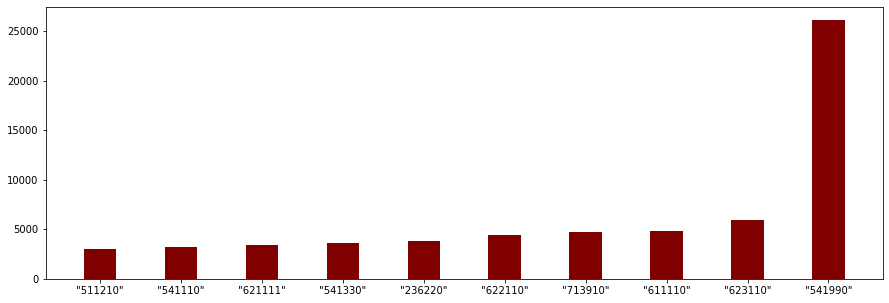

In [30]:
sector_USA = {k: v for k, v in sorted(sector_USA.items(), key=lambda item: item[1])}

plt.figure(figsize = (15,5))
plt.bar(list(sector_USA.keys())[-10:], list(sector_USA.values())[-10:], color ='maroon',width = 0.4)
plt.show()

In [31]:
file = open("Revenue.csv", "r")
next(file)
R_Dict = {}
n = 0

for row in file:
    i,date,d,_ = row.split(",")
    i = i[1:len(i)-1]
    if i in R_Dict.keys():
        _,D = d.split(":")
        if 'E' in D:
            D,p = D.split("E")
            D = float(D)*(10**int(p))
        else:
            D,_ = D.split(".")
        y,_,_ = date.split('-')
        y = int(y[1:])
        R_Dict[i].append((y,int(D)))
    else:
        _,D = d.split(":")
        if 'E' in D:
            D,p = D.split("E")
            D = float(D)*(10**int(p))
        else:
            D,_ = D.split(".")
        y,_,_ = date.split('-')
        y = int(y[1:])
        R_Dict[i] = [(y,int(D))]

    
file.close()
n = 0
for i in R_Dict.items():
    print(i,"\n")
    n += 1
    if n == 10:
        break

('000028f8-80c2-57c2-a20e-4ad50d2417b4', [(2015, 6880), (2014, 11617), (2013, 12638), (2011, 1291443), (2010, 4658056), (2006, 1628519), (2005, 1628519)]) 

('000064e3-2f41-5949-8ee6-e5c1221d3a55', [(2019, 765736), (2018, 808586), (2016, 16259663), (2015, 15125431), (2014, 706437), (2008, 550553)]) 

('00007d99-494a-5831-be00-5dd053b3763e', [(2017, 3940070), (2016, 4716616), (2014, 5272323), (2009, 14196)]) 

('0000813e-3adf-52dd-8835-274b7babc2f2', [(2015, 24369), (2014, 30513), (2013, 38554), (2012, 30134)]) 

('00010568-9413-5c3d-b8b4-a03d4fc7dba6', [(2016, 7712468), (2015, 7155971), (2007, 29168423), (2006, 28730672)]) 

('00017f58-baec-51fd-9a90-e2acae968457', [(1997, 136719498), (1996, 128044405), (1995, 120259849), (1994, 102796965)]) 

('0001e381-e787-576d-8183-56e0f5f4a895', [(2007, 1414886), (2006, 250000)]) 

('00023c5a-004b-53a9-b57f-fca73cca257f', [(2005, 90577289), (2004, 84509633), (2003, 37616184), (2002, 36464349), (2001, 41531051), (2000, 42262957), (1999, 34668532), 

In [32]:
file = open("EBITDA.csv", "r")
next(file)
EBITDA_Dict = {}
n = 0

for row in file:
    #print(row)
    i,date,d,_ = row.split(",")
    i = i[1:len(i)-1]
    if i in EBITDA_Dict.keys():
        _,D = d.split(":")
        if 'E' in D:
            D,p = D.split("E")
            D = float(D)*(10**int(p))
        else:
            D,_ = D.split(".")
        y,_,_ = date.split('-')
        y = int(y[1:])
        EBITDA_Dict[i].append((y,int(D)))
    else:
        _,D = d.split(":")
        if 'E' in D:
            D,p = D.split("E")
            D = float(D)*(10**int(p))
        else:
            D,_ = D.split(".")
        y,_,_ = date.split('-')
        y = int(y[1:])
        EBITDA_Dict[i] = [(y,int(D))]
    
    
file.close()
n = 0
for i in EBITDA_Dict.items():
    print(i,"\n")
    n += 1
    if n == 10:
        break

('00017f58-baec-51fd-9a90-e2acae968457', [(1997, 15472548), (1996, 15514546), (1995, 14214730), (1994, 16634335)]) 

('0001e381-e787-576d-8183-56e0f5f4a895', [(2007, -4383671), (2006, -2998895), (2005, -2560594)]) 

('00023c5a-004b-53a9-b57f-fca73cca257f', [(2005, 28599984), (2004, 26460521), (2003, 29117520), (2002, 29216123), (2001, 34802561), (2000, 37016498), (1999, 30351273), (1998, 16114194), (1997, 11413999), (1996, 8236829), (1995, 5206512), (1994, 3081799)]) 

('0004b29e-62ba-5f86-b3d5-4dcf0bd553b1', [(2020, 19000000), (2019, 2900000), (2018, 4400000), (2017, 5000000), (2016, 26600000), (2015, 17100000), (2014, 11399999), (2013, 9100000), (2012, 5000000), (2011, -7000000), (2010, -14200000), (2009, -16399999), (2008, -21500000), (2007, 1400000), (2006, 21100000), (2005, 35600000), (2004, 30000000), (2003, 12900000), (2002, 14000000), (2001, 32299999), (2000, 37500000), (1999, 35200000), (1998, 32400000), (1997, 24251000), (1996, 27033999)]) 

('000a6285-b1d9-5767-9a9e-dc9b370f

In [33]:
X_R, Data_Dict_R = Get_Data(R_Dict)
print(len(X_R))

C = common.intersection(list(Data_Dict_R.keys()))
print(len(list(C)))

6864
2396


In [34]:
file = open("S_and_L.csv", "r")
next(file)
NAICS = ['541990', '623110', '611110', '713910', '622110', '236220', '541330', '621111', '541110', '511210']

S = {}
n = 0
for row in file:
    #print(row)
    n += 1
    try:
        ID,sector,location = row.split(",")
        ID = ID[1:len(ID)-1]
        if ID in C:
            if sector in S.keys():
                S[sector] += 1
            else:
                S[sector] = 1

    except ValueError:
        continue 
    
print(n)

11924843


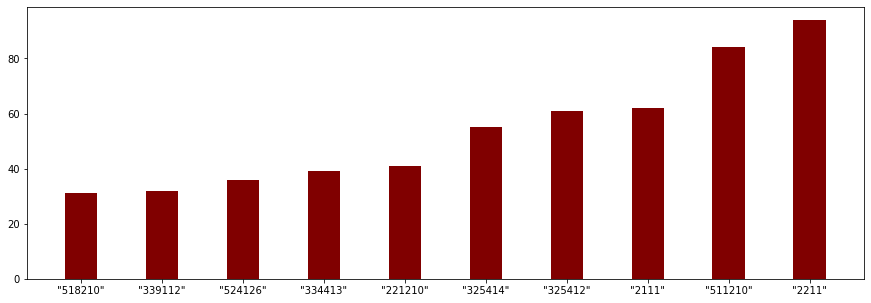

In [35]:
S = {k: v for k, v in sorted(S.items(), key=lambda item: item[1])}

plt.figure(figsize = (15,5))
plt.bar(list(S.keys())[-10:], list(S.values())[-10:], color ='maroon',width = 0.4)
plt.show()

In [36]:
def Any_First_5(NDE_Dict):
    Year = []
    Data = []
    for I in NDE_Dict.items():
        ID,info = I
        if len(info) >= 5:
            year = []
            data = []
            for j in info:
                date,val = j
                year.append(date)
                data.append(val)

            Year.append([ID,year])
            Data.append(data)


    Data_Dict = {}
    X = []
    for i in range(len(Year)):
        Data_Dict[Year[i][0]] = [Data[i][:5], Year[i][1][:5]]
        X.append(Data[i][:5])
            
    
    return X, Data_Dict

In [37]:
EBITDA_Data, Dict_EBITDA = Any_First_5(EBITDA_Dict)
# print(len(X_R))
n = 0
for i in Dict_EBITDA.items():
    print(i,"\n")
    n += 1
    if n == 5:
        break

('00023c5a-004b-53a9-b57f-fca73cca257f', [[28599984, 26460521, 29117520, 29216123, 34802561], [2005, 2004, 2003, 2002, 2001]]) 

('0004b29e-62ba-5f86-b3d5-4dcf0bd553b1', [[19000000, 2900000, 4400000, 5000000, 26600000], [2020, 2019, 2018, 2017, 2016]]) 

('000a6285-b1d9-5767-9a9e-dc9b370fbb89', [[81620328, 48777000, 93316000, 83753000, 64470000], [2021, 2020, 2019, 2018, 2017]]) 

('001478f6-4887-5135-9b07-f52dd610403a', [[58651000, 10619000, 38298000, -19166000, -6594000], [2002, 2001, 2000, 1999, 1998]]) 

('00164871-7831-5f95-8d76-db5fd0675daf', [[-850692, -830881, -2172225, -4966850, -2994578], [2011, 2010, 2009, 2008, 2007]]) 



In [38]:
R_Data, Dict_R = Any_First_5(R_Dict)
#print(len(X_R))
n = 0
for i in Dict_R.items():
    print(i,"\n")
    n += 1
    if n == 5:
        break

('000028f8-80c2-57c2-a20e-4ad50d2417b4', [[6880, 11617, 12638, 1291443, 4658056], [2015, 2014, 2013, 2011, 2010]]) 

('000064e3-2f41-5949-8ee6-e5c1221d3a55', [[765736, 808586, 16259663, 15125431, 706437], [2019, 2018, 2016, 2015, 2014]]) 

('00023c5a-004b-53a9-b57f-fca73cca257f', [[90577289, 84509633, 37616184, 36464349, 41531051], [2005, 2004, 2003, 2002, 2001]]) 

('00025a53-1cdd-563a-8de7-e535c72bcc22', [[9892153, 59015, 9486662, 49437, 9514059], [2017, 2016, 2016, 2015, 2015]]) 

('0003eef1-66f2-5dcc-8af2-fdb1c04b83b9', [[91486, 74658, 46523917, 41200651, 37943587], [2015, 2014, 2008, 2006, 2005]]) 



In [39]:
NDE_Data, Dict_NDE = Any_First_5(NDE_Dict)
TDE_Data, Dict_TDE = Any_First_5(TDE_Dict)

Intersection = set.intersection(set(Dict_R.keys()),set(Dict_NDE.keys()),set(Dict_TDE.keys()), set(Dict_EBITDA.keys()))

print(len(NDE_Data))
print(len(TDE_Data))
print(len(Intersection))

12525
12270
10275


In [43]:
Data_Set = {}
for i in Intersection:
    if (i in Dict_R.keys()) and (i in Dict_NDE.keys()) and (i in Dict_TDE.keys()) and (i in Dict_EBITDA.keys()) and (i in USA_sector_list.keys()):
        if Dict_R[i][1] == Dict_NDE[i][1] == Dict_TDE[i][1] == Dict_EBITDA[i][1]:
            Data_Set[i] = {'Year':Dict_R[i][1],'Sector': USA_sector_list[i],'R': Dict_R[i][0],'EBITDA':Dict_EBITDA[i][0], 'NDE': Dict_NDE[i][0], 'TDE': Dict_TDE[i][0]}
            
print(len(Data_Set))
        

n = 0
for i in Data_Set.items():
    print(i,"\n")
    n += 1
    if n == 2:
        break

%store Data_Set

7440
('43dd0641-8b1c-59b6-bf31-34e51c555761', {'Year': [2018, 2017, 2016, 2015, 2014], 'Sector': '"713210"', 'R': [72573907, 72318836, 68191837, 62567540, 61064684], 'EBITDA': [5334401, 6084786, 7645315, 5499604, 4643608], 'NDE': [-0.0, 0.2, 0.7, -0.0, 0.9], 'TDE': [23, 35, 49, 23, 43]}) 

('6e8f931b-af06-5f86-a4ba-2176912af400', {'Year': [2018, 2017, 2016, 2015, 2014], 'Sector': '"524126"', 'R': [1466336000, 1275713000, 1179796000, 1052805000, 1000062999], 'EBITDA': [65173000, 98141000, 129672000, 138775000, 150208000], 'NDE': [1.0, 1.6, 1.5, 1.3, 1.1], 'TDE': [22, 21, 22, 24, 25]}) 

Stored 'Data_Set' (dict)


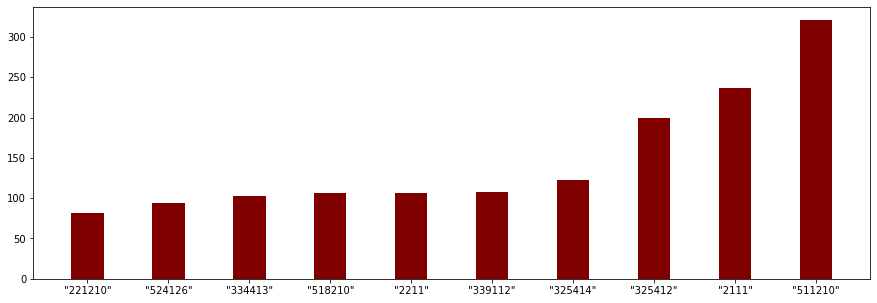

In [41]:
S = {}
for i in Data_Set.values():
    if i[3] in S.keys():
        S[i[3]] += 1
    else:
        S[i[3]] = 1

    
S = {k: v for k, v in sorted(S.items(), key=lambda item: item[1])}

plt.figure(figsize = (15,5))
plt.bar(list(S.keys())[-10:], list(S.values())[-10:], color ='maroon',width = 0.4)
plt.show()

In [42]:
"511210", "2111", "325412"

('511210', '2111', '325412')